In [7]:
# Iris Flower Classification
# Objective: Classify iris species using features like petal/sepal length and width.
# Dataset: iris()
# Model: K-Nearest Neighbors / Decision Tree / Logistic Regression
# Visualization:
#   o Plot decision boundaries 
#   o Use for EDA (color-coded by species)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['target'])

# Map target values to species names
iris_df['species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display first and last five rows after changes
print("First five rows after adding species column:")
print(iris_df.head())

print("\nLast five rows after adding species column:")
print(iris_df.tail())


First five rows after adding species column:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0     0.0  setosa  
1     0.0  setosa  
2     0.0  setosa  
3     0.0  setosa  
4     0.0  setosa  

Last five rows after adding species column:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2             

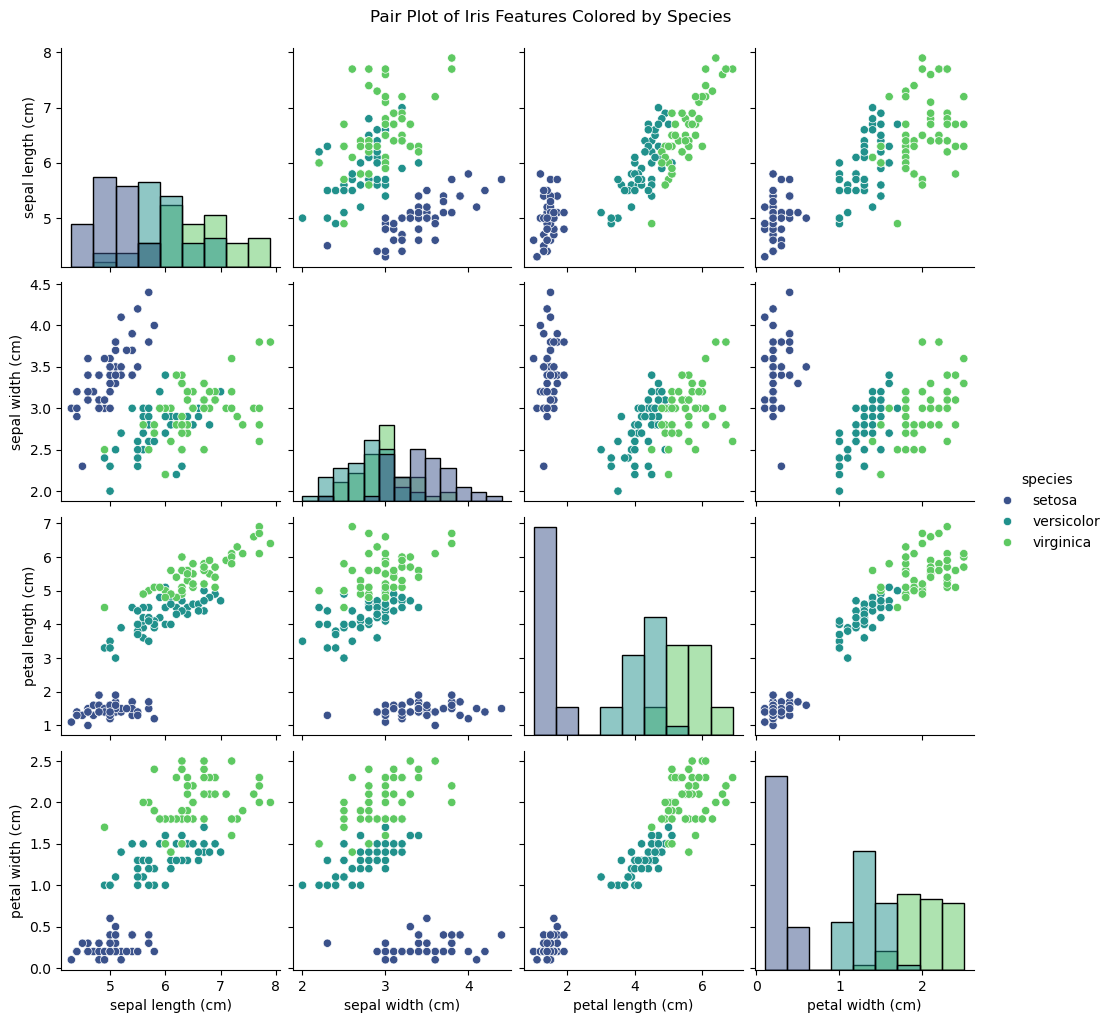

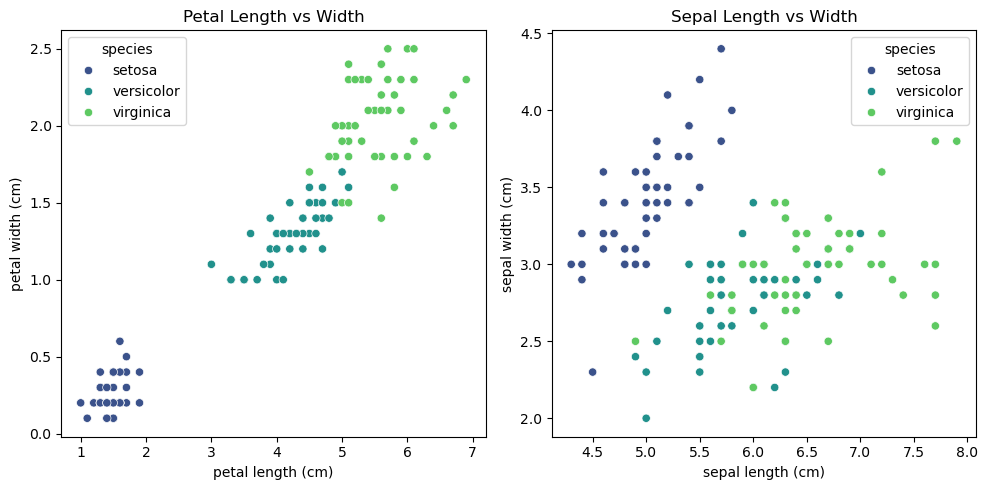

In [8]:
# Pair plot for EDA
sns.pairplot(iris_df, hue='species', palette='viridis',
             vars=iris['feature_names'], diag_kind='hist')
plt.suptitle('Pair Plot of Iris Features Colored by Species', y=1.02)
plt.show()

# Scatter plots for petal and sepal features
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='species', palette='viridis')
plt.title('Petal Length vs Width')

plt.subplot(1, 2, 2)
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='viridis')
plt.title('Sepal Length vs Width')

plt.tight_layout()
plt.show()


In [9]:
from sklearn.model_selection import train_test_split

# Feature and target setup
X_all = iris_df[iris['feature_names']]
X_petal = iris_df[['petal length (cm)', 'petal width (cm)']]
y = iris_df['target']

# Splitting the dataset
X_train_all, X_test_all, y_train, y_test = train_test_split(X_all, y, test_size=0.3, random_state=42)
X_train_petal, X_test_petal, _, _ = train_test_split(X_petal, y, test_size=0.3, random_state=42)



In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize models
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42)
}

# Train and evaluate function
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=iris.target_names,
                yticklabels=iris.target_names)
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Classification report
    print(classification_report(y_test, y_pred, target_names=iris.target_names))
    return model


🔹 RESULTS USING PETAL FEATURES (Petal Length + Width):

KNN Model:


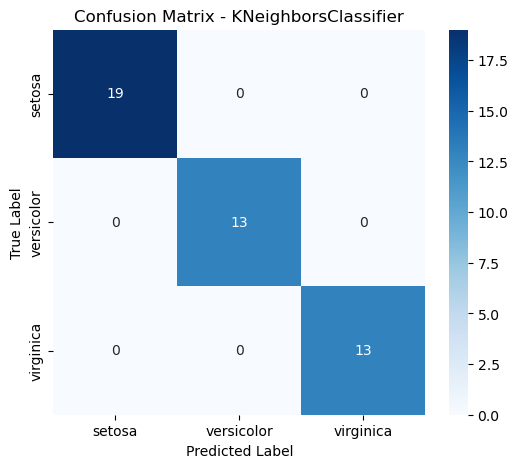

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Decision Tree Model:


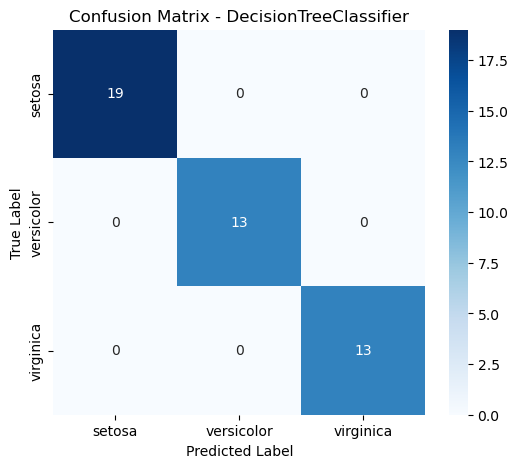

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Logistic Regression Model:


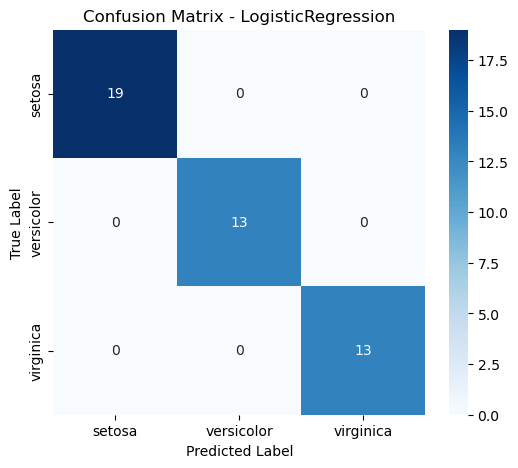

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [11]:
print("🔹 RESULTS USING PETAL FEATURES (Petal Length + Width):")
for name, model in models.items():
    print(f"\n{name} Model:")
    train_and_evaluate(model, X_train_petal, X_test_petal, y_train, y_test)



🔹 RESULTS USING ALL FEATURES:

KNN Model:


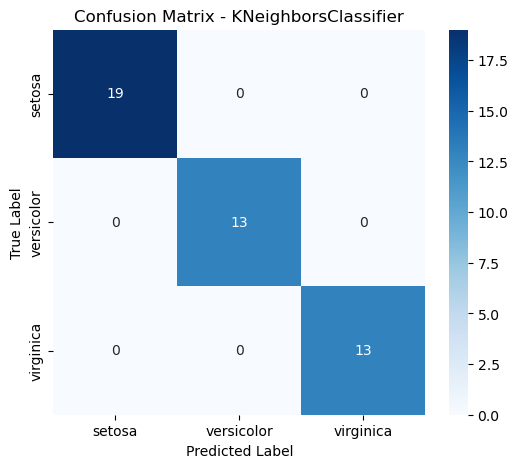

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Decision Tree Model:


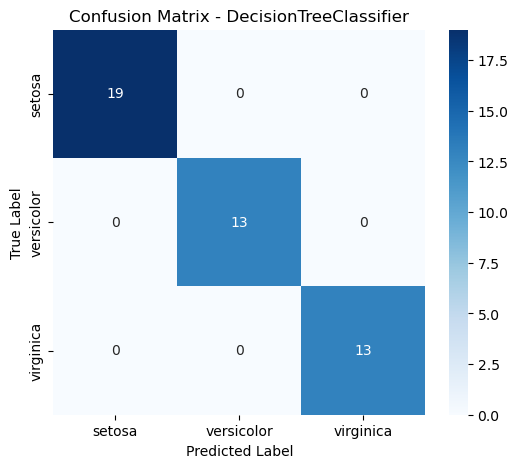

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Logistic Regression Model:


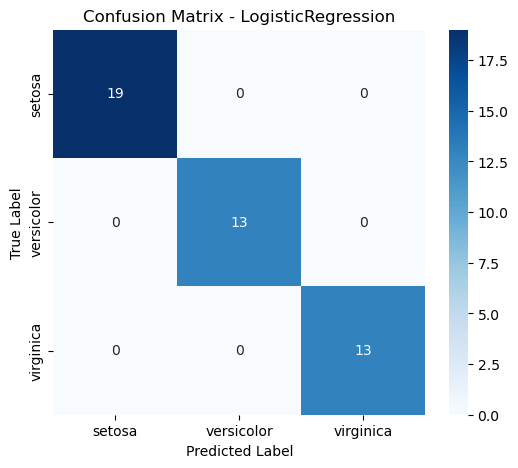

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [12]:
print("\n🔹 RESULTS USING ALL FEATURES:")
for name, model in models.items():
    print(f"\n{name} Model:")
    train_and_evaluate(model, X_train_all, X_test_all, y_train, y_test)


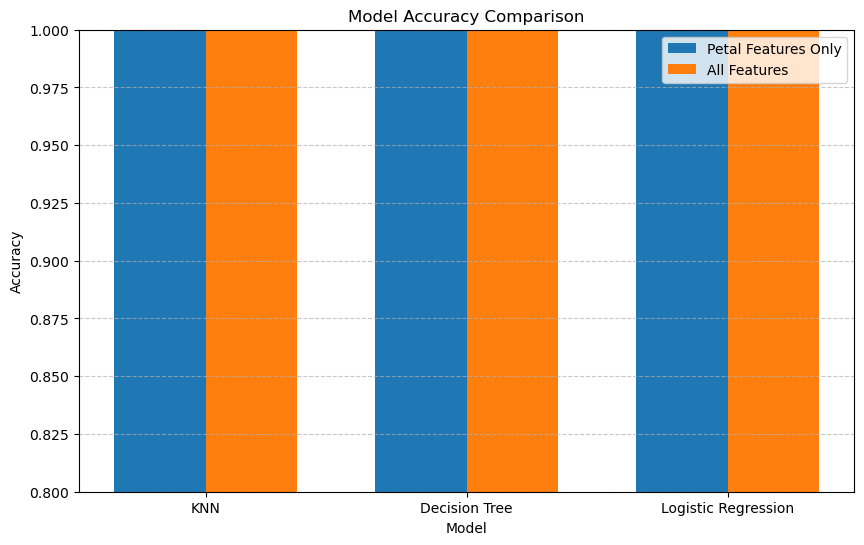

In [13]:
def get_accuracies(models, X_train, X_test, y_train, y_test):
    acc = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc[name] = accuracy_score(y_test, y_pred)
    return acc

# Get accuracies for both feature sets
acc_petal = get_accuracies(models, X_train_petal, X_test_petal, y_train, y_test)
acc_all = get_accuracies(models, X_train_all, X_test_all, y_train, y_test)

# Plot
plt.figure(figsize=(10, 6))
width = 0.35
x = np.arange(len(models))

plt.bar(x - width/2, acc_petal.values(), width, label='Petal Features Only')
plt.bar(x + width/2, acc_all.values(), width, label='All Features')

plt.xticks(x, models.keys())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.legend()
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


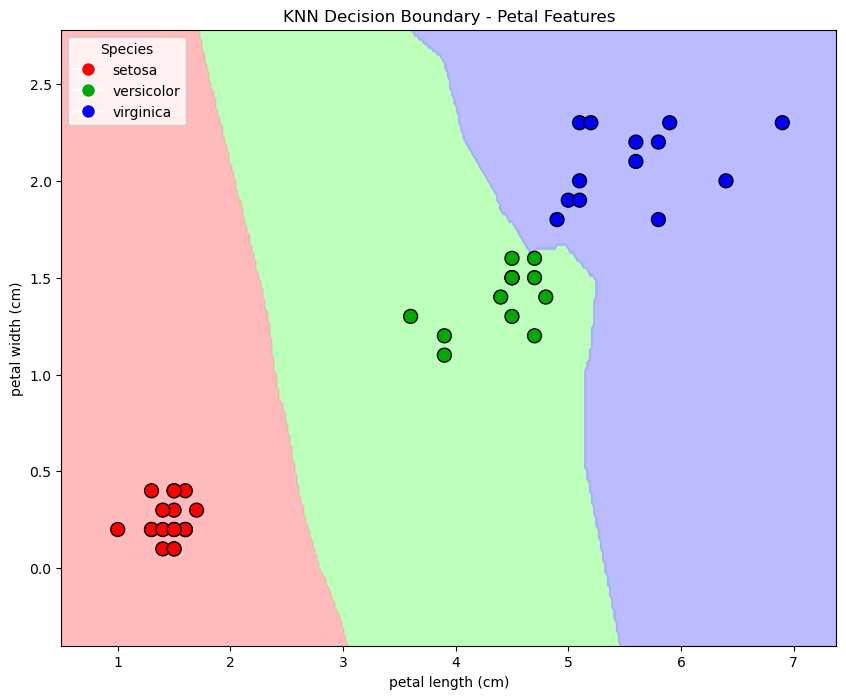

In [14]:
from matplotlib.colors import ListedColormap

def plot_petal_decision_boundary(model, X, y, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['#FF0000', '#00AA00', '#0000FF']

    X_array = X.values
    y_array = y.values
    feature_names = X.columns.tolist()

    x_min, x_max = X_array[:, 0].min() - 0.5, X_array[:, 0].max() + 0.5
    y_min, y_max = X_array[:, 1].min() - 0.5, X_array[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(X_array[:, 0], X_array[:, 1], c=y_array, cmap=ListedColormap(cmap_bold),
                edgecolor='k', s=100)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)

    species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
    legend_labels = [plt.Line2D([0], [0], marker='o', color='w',
                                markerfacecolor=cmap_bold[i], markersize=10,
                                label=species_map[i]) for i in range(3)]
    plt.legend(handles=legend_labels, title='Species')
    plt.show()

# Train and plot decision boundary
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_petal, y_train)

plot_petal_decision_boundary(knn_model, X_test_petal, y_test,
                             'KNN Decision Boundary - Petal Features')
